<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
from sklearn.metrics import roc_auc_score
from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

#### Read the CSV file project and resorce.

In [ ]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [ ]:
project_data.shape

(109248, 17)

In [ ]:
resource_data.shape

(1541272, 4)

    • There are 109248 datapoints and 17 features in project file.
    • There are 1541272  datapoints and 4 features in resource file.

In [ ]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [ ]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity'],
      dtype='object')

In [ ]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:

#filtered_data["Time"] = filtered_data["Time"].map(lambda t: datetime.datetime.fromtimestamp(int(t)).strftime('%Y-%m-%d %H:%M:%S'))
project_data = project_data[project_data['teacher_prefix'].isnull() == False]
project_data_final = project_data.sort_values('id',axis=0,kind="quicksort", ascending=True)
#project_data_final = sortedData[sortedData.HelpfulnessNumerator <= final.HelpfulnessDenominator]

#As data is huge, due to computation limitation we will randomly select data. we will try to pick data in a way so that it doesn't make data imbalance problem
project_data_approve = project_data_final[project_data_final.project_is_approved == 1]
project_data_approve = project_data_approve.sample(n = 33000 ,replace=True) #0.055
project_data_reject = project_data_final[project_data_final.project_is_approved == 0]
project_data_reject = project_data_reject.sample(n = 17000,replace=True) #0.25
project_data_temp = pd.concat([project_data_approve,project_data_reject],axis=0)
#sording data by timestamp so that it can be devided in train and cross validate dataset for time based slicing.
project_data_temp = project_data_temp.sort_values('Date',axis=0,kind="quicksort", ascending=True).reset_index(drop=True)

### • Splitting Data

In [ ]:

X = project_data_temp
y = project_data_temp["project_is_approved"]
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(22445, 20)
(11055, 20)
(16500, 20)


In [ ]:
X1 = X_test.loc[X_test['project_is_approved'] == 1]

In [ ]:
X1.shape

(10890, 20)

In [ ]:
X_test.shape

(16500, 20)

### school_state : categorical data (one hot encoding)

In [ ]:
def get_proba(X,x1):
# we use count vectorizer to convert the values into one hot encoded features
    state_list = list(np.unique(X))
    dic_state = dict()
    count = 0
#    length = X['school_state'].shape[0]
    X1 = x1.loc[x1['project_is_approved'] == 1]
    length = X.shape[0]
    length1 = X1.shape[0]
    for i in state_list:
        count = 0
#        for j in X['school_state']:
        for j in X:
            if j == i:
                count = count + 1
#    print("count of individual state")        
#        print(i,count)
        prob = (count / length1)
        prob = round(prob, 5)
        dic_state[i] = prob
    print(dic_state)
    from numpy import zeros
    import scipy
    a = zeros([length,1])
    
    count = 0
    for j in X:
#for j in X['school_state']:        
        a[count] = dic_state[j]
        count = count +1             
    b = scipy.sparse.csr_matrix(a) 
    return b

In [ ]:
school_state_train = get_proba(X_train['school_state'],X_train)
print("Shape of matrix train data ",school_state_train.shape)

{'AK': 0.0052, 'AL': 0.02282, 'AR': 0.01607, 'AZ': 0.03031, 'CA': 0.20292, 'CO': 0.01546, 'CT': 0.02012, 'DC': 0.0081, 'DE': 0.00412, 'FL': 0.08883, 'GA': 0.05414, 'HI': 0.00702, 'IA': 0.00986, 'ID': 0.01006, 'IL': 0.06156, 'IN': 0.03551, 'KS': 0.00905, 'KY': 0.0185, 'LA': 0.03517, 'MA': 0.032, 'MD': 0.02302, 'ME': 0.00641, 'MI': 0.04354, 'MN': 0.01762, 'MO': 0.03449, 'MS': 0.0187, 'MT': 0.00378, 'NC': 0.0698, 'ND': 0.00182, 'NE': 0.00405, 'NH': 0.00466, 'NJ': 0.03301, 'NM': 0.00837, 'NV': 0.01863, 'NY': 0.09646, 'OH': 0.03429, 'OK': 0.03206, 'OR': 0.01715, 'PA': 0.04253, 'RI': 0.00344, 'SC': 0.05549, 'SD': 0.00412, 'TN': 0.0243, 'TX': 0.10848, 'UT': 0.02531, 'VA': 0.02801, 'VT': 0.00108, 'WA': 0.0326, 'WI': 0.02855, 'WV': 0.00567, 'WY': 0.00088}
Shape of matrix train data  (22445, 1)


In [ ]:
school_state_cv = get_proba(X_cv['school_state'],X_cv)
print("Shape of matrix cv data ",school_state_cv.shape)

{'AK': 0.00562, 'AL': 0.02344, 'AR': 0.01329, 'AZ': 0.03084, 'CA': 0.2097, 'CO': 0.01672, 'CT': 0.02056, 'DC': 0.00658, 'DE': 0.00315, 'FL': 0.09046, 'GA': 0.05578, 'HI': 0.00603, 'IA': 0.00781, 'ID': 0.00863, 'IL': 0.06072, 'IN': 0.03605, 'KS': 0.01028, 'KY': 0.01782, 'LA': 0.03303, 'MA': 0.03358, 'MD': 0.02001, 'ME': 0.0074, 'MI': 0.04345, 'MN': 0.01562, 'MO': 0.03194, 'MS': 0.01837, 'MT': 0.00233, 'NC': 0.06456, 'ND': 0.00164, 'NE': 0.00493, 'NH': 0.00411, 'NJ': 0.03248, 'NM': 0.00877, 'NV': 0.01905, 'NY': 0.09539, 'OH': 0.03564, 'OK': 0.03468, 'OR': 0.02056, 'PA': 0.04633, 'RI': 0.00384, 'SC': 0.05935, 'SD': 0.0037, 'TN': 0.02316, 'TX': 0.10704, 'UT': 0.0259, 'VA': 0.02919, 'VT': 0.00069, 'WA': 0.03111, 'WI': 0.02467, 'WV': 0.00822, 'WY': 0.00096}
Shape of matrix cv data  (11055, 1)


In [ ]:
school_state_test = get_proba(X_test['school_state'],X_test)
print("Shape of matrix cv data ",school_state_test.shape)

{'AK': 0.00404, 'AL': 0.02351, 'AR': 0.01203, 'AZ': 0.03058, 'CA': 0.21276, 'CO': 0.01745, 'CT': 0.02516, 'DC': 0.00652, 'DE': 0.00478, 'FL': 0.09073, 'GA': 0.05344, 'HI': 0.00725, 'IA': 0.00854, 'ID': 0.01102, 'IL': 0.05721, 'IN': 0.03893, 'KS': 0.00781, 'KY': 0.01809, 'LA': 0.03315, 'MA': 0.03425, 'MD': 0.02057, 'ME': 0.0067, 'MI': 0.04233, 'MN': 0.01497, 'MO': 0.03416, 'MS': 0.01809, 'MT': 0.0034, 'NC': 0.07309, 'ND': 0.00184, 'NE': 0.00358, 'NH': 0.0045, 'NJ': 0.03067, 'NM': 0.00753, 'NV': 0.01965, 'NY': 0.10193, 'OH': 0.03333, 'OK': 0.03398, 'OR': 0.018, 'PA': 0.04022, 'RI': 0.00441, 'SC': 0.0551, 'SD': 0.00523, 'TN': 0.0247, 'TX': 0.10331, 'UT': 0.02489, 'VA': 0.02902, 'VT': 0.00073, 'WA': 0.02764, 'WI': 0.02645, 'WV': 0.00725, 'WY': 0.00064}
Shape of matrix cv data  (16500, 1)


### Observation:
    Shape of matrix of school_state after one hot encodig  :
     • train data (22445, 1)
     • CV data (11055, 1)
     • test data (16500, 1)

### clean_categories : categorical data (one hot encoding)

In [ ]:
def clean_categories (catogories,X):
    
#    catogories = list(project_data_temp['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
    cat_list = []
    for i in catogories:
        temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        cat_list.append(temp.strip())
    X['clean_categories'] = cat_list   
#    print(X['clean_categories'])
    return X ;

In [ ]:
# we use count vectorizer to convert the values into one hot encoded features
#from sklearn.feature_extraction.text import CountVectorizer
catogories = list(X_train['project_subject_categories'].values)
X_tr_cc = clean_categories(catogories,X_train)
clean_cat_train = get_proba(X_tr_cc['clean_categories'],X_tr_cc)
print("Shape of matrix train data ",clean_cat_train.shape)

{'AppliedLearning': 0.0563, 'AppliedLearning Health_Sports': 0.0083, 'AppliedLearning History_Civics': 0.00263, 'AppliedLearning Literacy_Language': 0.03031, 'AppliedLearning Math_Science': 0.01499, 'AppliedLearning Music_Arts': 0.0104, 'AppliedLearning SpecialNeeds': 0.0218, 'AppliedLearning Warmth Care_Hunger': 7e-05, 'Health_Sports': 0.14149, 'Health_Sports AppliedLearning': 0.0025, 'Health_Sports History_Civics': 0.00034, 'Health_Sports Literacy_Language': 0.01141, 'Health_Sports Math_Science': 0.00378, 'Health_Sports Music_Arts': 0.00196, 'Health_Sports SpecialNeeds': 0.01775, 'Health_Sports Warmth Care_Hunger': 0.00014, 'History_Civics': 0.02828, 'History_Civics AppliedLearning': 0.00101, 'History_Civics Health_Sports': 0.00014, 'History_Civics Literacy_Language': 0.02012, 'History_Civics Math_Science': 0.00452, 'History_Civics Music_Arts': 0.00459, 'History_Civics SpecialNeeds': 0.00297, 'History_Civics Warmth Care_Hunger': 0.00014, 'Literacy_Language': 0.31328, 'Literacy_Langua

In [ ]:
# we use count vectorizer to convert the values into one hot encoded features
#from sklearn.feature_extraction.text import CountVectorizer
catogories = list(X_cv['project_subject_categories'].values)
X_cv_cc = clean_categories(catogories,X_cv)
clean_cat_cv = get_proba(X_cv_cc['clean_categories'],X_cv_cc)
print("Shape of matrix cv data ",clean_cat_cv.shape)

{'AppliedLearning': 0.05414, 'AppliedLearning Health_Sports': 0.00822, 'AppliedLearning History_Civics': 0.00178, 'AppliedLearning Literacy_Language': 0.03399, 'AppliedLearning Math_Science': 0.01562, 'AppliedLearning Music_Arts': 0.00946, 'AppliedLearning SpecialNeeds': 0.01974, 'AppliedLearning Warmth Care_Hunger': 0.00041, 'Health_Sports': 0.14597, 'Health_Sports AppliedLearning': 0.00247, 'Health_Sports History_Civics': 0.00055, 'Health_Sports Literacy_Language': 0.01206, 'Health_Sports Math_Science': 0.0048, 'Health_Sports Music_Arts': 0.00206, 'Health_Sports SpecialNeeds': 0.01933, 'Health_Sports Warmth Care_Hunger': 0.00014, 'History_Civics': 0.02645, 'History_Civics AppliedLearning': 0.00041, 'History_Civics Health_Sports': 0.00014, 'History_Civics Literacy_Language': 0.02083, 'History_Civics Math_Science': 0.0063, 'History_Civics Music_Arts': 0.00411, 'History_Civics SpecialNeeds': 0.00356, 'Literacy_Language': 0.31785, 'Literacy_Language AppliedLearning': 0.00905, 'Literacy_L

In [ ]:
# we use count vectorizer to convert the values into one hot encoded features
#from sklearn.feature_extraction.text import CountVectorizer
catogories = list(X_test['project_subject_categories'].values)
X_test_cc = clean_categories(catogories,X_test)
clean_cat_test = get_proba(X_test_cc['clean_categories'],X_test_cc)
print("Shape of matrix cv data ",clean_cat_test.shape)

{'AppliedLearning': 0.05702, 'AppliedLearning Health_Sports': 0.00973, 'AppliedLearning History_Civics': 0.00165, 'AppliedLearning Literacy_Language': 0.03251, 'AppliedLearning Math_Science': 0.01644, 'AppliedLearning Music_Arts': 0.0123, 'AppliedLearning SpecialNeeds': 0.02213, 'AppliedLearning Warmth Care_Hunger': 0.00037, 'Health_Sports': 0.14656, 'Health_Sports AppliedLearning': 0.00257, 'Health_Sports History_Civics': 0.00055, 'Health_Sports Literacy_Language': 0.01166, 'Health_Sports Math_Science': 0.00441, 'Health_Sports Music_Arts': 0.0023, 'Health_Sports SpecialNeeds': 0.01882, 'Health_Sports Warmth Care_Hunger': 0.00046, 'History_Civics': 0.02663, 'History_Civics AppliedLearning': 0.00064, 'History_Civics Health_Sports': 0.00018, 'History_Civics Literacy_Language': 0.01892, 'History_Civics Math_Science': 0.00487, 'History_Civics Music_Arts': 0.00496, 'History_Civics SpecialNeeds': 0.00312, 'History_Civics Warmth Care_Hunger': 9e-05, 'Literacy_Language': 0.31038, 'Literacy_Lan

### Observation:
    Shape of matrix of clean_categories after one hot encodig  :
     • train data (22445, 1)
     • CV data (11055, 1)
     • test data (16500, 1)

### clean_subcategories : categorical data (one hot encoding)

In [ ]:
#sub_catogories = list(project_data_temp['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

def clean_subcategories(sub_catogories,X):
    sub_cat_list = []
    for i in sub_catogories:
        temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_')
        sub_cat_list.append(temp.strip())

    X['clean_subcategories'] = sub_cat_list
    return X


In [ ]:
#vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_catogories = list(X_train['project_subject_subcategories'].values)
X_tr_sub_cc = clean_subcategories(sub_catogories,X_train)
clean_sub_cat_train = get_proba(X_tr_sub_cc['clean_categories'],X_tr_sub_cc)
print("Shape of matrix train data ",clean_sub_cat_train.shape)

{'AppliedLearning': 0.0563, 'AppliedLearning Health_Sports': 0.0083, 'AppliedLearning History_Civics': 0.00263, 'AppliedLearning Literacy_Language': 0.03031, 'AppliedLearning Math_Science': 0.01499, 'AppliedLearning Music_Arts': 0.0104, 'AppliedLearning SpecialNeeds': 0.0218, 'AppliedLearning Warmth Care_Hunger': 7e-05, 'Health_Sports': 0.14149, 'Health_Sports AppliedLearning': 0.0025, 'Health_Sports History_Civics': 0.00034, 'Health_Sports Literacy_Language': 0.01141, 'Health_Sports Math_Science': 0.00378, 'Health_Sports Music_Arts': 0.00196, 'Health_Sports SpecialNeeds': 0.01775, 'Health_Sports Warmth Care_Hunger': 0.00014, 'History_Civics': 0.02828, 'History_Civics AppliedLearning': 0.00101, 'History_Civics Health_Sports': 0.00014, 'History_Civics Literacy_Language': 0.02012, 'History_Civics Math_Science': 0.00452, 'History_Civics Music_Arts': 0.00459, 'History_Civics SpecialNeeds': 0.00297, 'History_Civics Warmth Care_Hunger': 0.00014, 'Literacy_Language': 0.31328, 'Literacy_Langua

In [ ]:
#vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_catogories = list(X_cv['project_subject_subcategories'].values)
X_cv_sub_cc = clean_subcategories(sub_catogories,X_cv)
clean_sub_cat_cv = get_proba(X_cv_sub_cc['clean_categories'],X_cv_sub_cc)
print("Shape of matrix cv data ",clean_sub_cat_cv.shape)

{'AppliedLearning': 0.05414, 'AppliedLearning Health_Sports': 0.00822, 'AppliedLearning History_Civics': 0.00178, 'AppliedLearning Literacy_Language': 0.03399, 'AppliedLearning Math_Science': 0.01562, 'AppliedLearning Music_Arts': 0.00946, 'AppliedLearning SpecialNeeds': 0.01974, 'AppliedLearning Warmth Care_Hunger': 0.00041, 'Health_Sports': 0.14597, 'Health_Sports AppliedLearning': 0.00247, 'Health_Sports History_Civics': 0.00055, 'Health_Sports Literacy_Language': 0.01206, 'Health_Sports Math_Science': 0.0048, 'Health_Sports Music_Arts': 0.00206, 'Health_Sports SpecialNeeds': 0.01933, 'Health_Sports Warmth Care_Hunger': 0.00014, 'History_Civics': 0.02645, 'History_Civics AppliedLearning': 0.00041, 'History_Civics Health_Sports': 0.00014, 'History_Civics Literacy_Language': 0.02083, 'History_Civics Math_Science': 0.0063, 'History_Civics Music_Arts': 0.00411, 'History_Civics SpecialNeeds': 0.00356, 'Literacy_Language': 0.31785, 'Literacy_Language AppliedLearning': 0.00905, 'Literacy_L

In [ ]:
#vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_catogories = list(X_test['project_subject_subcategories'].values)
X_test_sub_cc = clean_subcategories(sub_catogories,X_test)
clean_sub_cat_test = get_proba(X_test_sub_cc['clean_categories'],X_test_sub_cc)
print("Shape of matrix test data ",clean_sub_cat_test.shape)

{'AppliedLearning': 0.05702, 'AppliedLearning Health_Sports': 0.00973, 'AppliedLearning History_Civics': 0.00165, 'AppliedLearning Literacy_Language': 0.03251, 'AppliedLearning Math_Science': 0.01644, 'AppliedLearning Music_Arts': 0.0123, 'AppliedLearning SpecialNeeds': 0.02213, 'AppliedLearning Warmth Care_Hunger': 0.00037, 'Health_Sports': 0.14656, 'Health_Sports AppliedLearning': 0.00257, 'Health_Sports History_Civics': 0.00055, 'Health_Sports Literacy_Language': 0.01166, 'Health_Sports Math_Science': 0.00441, 'Health_Sports Music_Arts': 0.0023, 'Health_Sports SpecialNeeds': 0.01882, 'Health_Sports Warmth Care_Hunger': 0.00046, 'History_Civics': 0.02663, 'History_Civics AppliedLearning': 0.00064, 'History_Civics Health_Sports': 0.00018, 'History_Civics Literacy_Language': 0.01892, 'History_Civics Math_Science': 0.00487, 'History_Civics Music_Arts': 0.00496, 'History_Civics SpecialNeeds': 0.00312, 'History_Civics Warmth Care_Hunger': 9e-05, 'Literacy_Language': 0.31038, 'Literacy_Lan

### Observation:
    Shape of matrix of clean_subcategories  after one hot encodig  :
     • train data (22445, 1)
     • CV data (11055, 1)
     • test data (16500, 1)

###  teacher_prefix : categorical data (one hot encoding)

In [ ]:
#https://stackoverflow.com/questions/12282232/how-do-i-count-unique-values-inside-a-list"
def teacher_prefix(X1):
    X = X1
    state_teacher_prefix = list(X['teacher_prefix'])
    a = set()
    a = list(set(state_teacher_prefix))
    set(filter(lambda x: x == x , a))
    seen = set()
    result = []
    for j in a:
        if j not in seen:
        #if pd.notnull(j) == 'True':  
            seen.add(j)
            result.append(j)
    state_teacher_prefix = [x for x in result if str(x) != 'nan']
    return state_teacher_prefix
    print(state_teacher_prefix)
    #print(state_teacher_prefix)
    #teacher_prefix = X['teacher_prefix']
    #x_teacher_prefix = teacher_prefix[pd.notnull(teacher_prefix)]
# we use count vectorizer to convert the values into one hot encoded features     
    

In [ ]:
teacher_prefix_train = teacher_prefix(X_train)
#X_teacher_prefix_train = clean_subcategories(sub_catogories,X_train1)
train_teacher_prefix = get_proba(X_train['teacher_prefix'],X_train)
print("Shape of matrix test data ",train_teacher_prefix.shape)

{'Dr.': 7e-05, 'Mr.': 0.15263, 'Mrs.': 0.78797, 'Ms.': 0.53807, 'Teacher': 0.03638}
Shape of matrix test data  (22445, 1)


In [ ]:
teacher_prefix_cv = teacher_prefix(X_cv)
#X_teacher_prefix_train = clean_subcategories(sub_catogories,X_train1)
cv_teacher_prefix = get_proba(X_cv['teacher_prefix'],X_cv)
print("Shape of matrix cv data ",cv_teacher_prefix.shape)

{'Dr.': 0.00041, 'Mr.': 0.14391, 'Mrs.': 0.77399, 'Ms.': 0.56072, 'Teacher': 0.03618}
Shape of matrix cv data  (11055, 1)


In [ ]:
teacher_prefix_test = teacher_prefix(X_test)
#X_teacher_prefix_train = clean_subcategories(sub_catogories,X_train1)
test_teacher_prefix = get_proba(X_test['teacher_prefix'],X_test)
print("Shape of matrix test data ",test_teacher_prefix.shape)

{'Dr.': 0.00018, 'Mr.': 0.14959, 'Mrs.': 0.79311, 'Ms.': 0.53774, 'Teacher': 0.03453}
Shape of matrix test data  (16500, 1)


### Observation:
    Shape of matrix of teacher_prefix after one hot encodig  :
     • train data (22445, 1)
     • CV data (11055, 1)
     • test data (16500, 1)

### project_grade_category : categorical data (one hot encoding)

In [ ]:
def grade(X):
    project_data_temp = X
    grade_list = list(np.unique(project_data_temp['project_grade_category']))
# we use count vectorizer to convert the values into one hot encoded features
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(vocabulary=grade_list, lowercase=False, binary=True)
    vectorizer.fit(project_data_temp['project_grade_category'].values)
    #print(vectorizer.get_feature_names())
    grade_list_one_hot = vectorizer.transform(project_data_temp['project_grade_category'].values)
    print("Shape of matrix after one hot encodig ",grade_list_one_hot.shape)
    return grade_list_one_hot

In [ ]:
grade_list_train = get_proba(X_train['project_grade_category'],X_train)
print("Shape of matrix train data ",grade_list_train.shape)

{'Grades 3-5': 0.51006, 'Grades 6-8': 0.2337, 'Grades 9-12': 0.15566, 'Grades PreK-2': 0.6157}
Shape of matrix train data  (22445, 1)


In [ ]:
grade_list_cv = get_proba(X_cv['project_grade_category'],X_cv)
print("Shape of matrix cv data ",grade_list_cv.shape)

{'Grades 3-5': 0.50863, 'Grades 6-8': 0.24274, 'Grades 9-12': 0.15378, 'Grades PreK-2': 0.61006}
Shape of matrix cv data  (11055, 1)


In [ ]:
grade_list_test = get_proba(X_test['project_grade_category'],X_test)
print("Shape of matrix test data ",grade_list_test.shape)

{'Grades 3-5': 0.50698, 'Grades 6-8': 0.24242, 'Grades 9-12': 0.15904, 'Grades PreK-2': 0.6067}
Shape of matrix test data  (16500, 1)


### Observation:
    Shape of matrix of project_grade_category after one hot encodig  :
     • train data (22445, 1)
     • CV data (11055, 1)
     • test data (16500, 1)

###  project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)

####   project_title : text data (BOW)

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:

#project title
# Combining all the above statemennts 
def process_title(X):
        project_data_temp = X
        from tqdm import tqdm
        preprocessed_project_title= []
# tqdm is for printing the status bar
        for sentance in tqdm(project_data_temp['project_title'].values):
            sent = decontracted(sentance)
            sent = sent.replace('\\r', ' ')
            sent = sent.replace('\\"', ' ')
            sent = sent.replace('\\n', ' ')
            sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
            sent = ' '.join(e for e in sent.split() if e not in stopwords)
            preprocessed_project_title.append(sent.lower().strip())

# We are considering only the words which appeared in at least 10 documents(rows or projects).
        #vectorizer = CountVectorizer(min_df=10)
        #text_bow = vectorizer.fit_transform(preprocessed_project_title)
        #print("BOW ",text_bow.shape)
        return preprocessed_project_title

In [ ]:
preprocessed_project_title_train = process_title(X_train)
vectorizer = CountVectorizer(min_df=10)
vectorizer_preprocessed_project_title_train = vectorizer
text_bow_train = vectorizer.fit_transform(preprocessed_project_title_train)
print("Train BOW ",text_bow_train .shape)
preprocessed_project_title_cv = process_title(X_cv)
text_bow_cv = vectorizer.transform(preprocessed_project_title_cv)
vectorizer_preprocessed_project_title_cv = vectorizer
print("CV BOW ",text_bow_cv .shape)
preprocessed_project_title_test = process_title(X_test)
text_bow_test = vectorizer.transform(preprocessed_project_title_test)
vectorizer_preprocessed_project_title_test = vectorizer
print("Test BOW ",text_bow_test .shape)

 76%|███████▌  | 8347/11055 [00:00<00:00, 41505.04it/s]

Train BOW  (22445, 1234)


 51%|█████▏    | 8472/16500 [00:00<00:00, 42419.62it/s]

CV BOW  (11055, 1234)


100%|██████████| 16500/16500 [00:00<00:00, 41799.12it/s]


Test BOW  (16500, 1234)


#### Observation:
    Shape of matrix of  project_title : text data (BOW) :
     • train data (22445, 1264)
     • CV data (11055, 1264)
     • test data (16500, 1264)

####  project_title : text data (TIDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_train = vectorizer.fit_transform(preprocessed_project_title_train)
vectorizer_tfidf_project_title_train = vectorizer
print("TFIDF ",text_tfidf_train.shape)
text_tfidf_cv = vectorizer.transform(preprocessed_project_title_cv)
print("TFIDF ",text_tfidf_cv.shape)
vectorizer_tfidf_project_title_cv = vectorizer
text_tfidf_test = vectorizer.transform(preprocessed_project_title_test)
print("TFIDF ",text_tfidf_test.shape)
vectorizer_tfidf_project_title_test = vectorizer

TFIDF  (22445, 1234)
TFIDF  (11055, 1234)
TFIDF  (16500, 1234)


#### Observation:
    Shape of matrix of  project_title : text data (TFIDF) :
     • train data (22445, 1264)
     • CV data (11055, 1264)
     • test data (16500, 1264)

####  project_title : text data (w2v_tfidf)

In [ ]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [ ]:
preprocessed_project_title = preprocessed_project_title_train
tfidf_model = TfidfVectorizer(lowercase=False)
tfidf_model.fit_transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)
print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))
text_w2v_tfidf_train = tfidf_w2v_vectors

0it [00:00, ?it/s]

Loading Glove Model


1917495it [02:30, 12737.34it/s]


Done. 1917495  words loaded!
all the words in the coupus 97107
the unique words in the coupus 7742
The number of words that are present in both glove vectors and our coupus 7498 ( 96.848 %)
word 2 vec length 7498


100%|██████████| 22445/22445 [00:00<00:00, 29271.42it/s]

22445
300


In [ ]:
preprocessed_project_title = preprocessed_project_title_cv
#tfidf_model = TfidfVectorizer(lowercase=False)
tfidf_model.transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)
print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))
text_w2v_tfidf_cv = tfidf_w2v_vectors

0it [00:00, ?it/s]

Loading Glove Model


1917495it [02:27, 12961.66it/s]


Done. 1917495  words loaded!
all the words in the coupus 47846
the unique words in the coupus 5477
The number of words that are present in both glove vectors and our coupus 5356 ( 97.791 %)
word 2 vec length 5356


100%|██████████| 11055/11055 [00:00<00:00, 27879.14it/s]

11055
300


In [ ]:
preprocessed_project_title = preprocessed_project_title_test
#tfidf_model = TfidfVectorizer(lowercase=False)
tfidf_model.transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)
print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))
text_w2v_tfidf_test = tfidf_w2v_vectors

0it [00:00, ?it/s]

Loading Glove Model


1917495it [02:27, 12958.03it/s]


Done. 1917495  words loaded!
all the words in the coupus 71389
the unique words in the coupus 6664
The number of words that are present in both glove vectors and our coupus 6473 ( 97.134 %)


100%|██████████| 16500/16500 [00:00<00:00, 30433.42it/s]

word 2 vec length 6473
16500
300


#### Observation:
    Shape of matrix of project_title : text data (W2V_TFIDF) :
     • train data (22445, 300)
     • CV data (11055, 300)
     • test data (16500, 300)

In [ ]:
preprocessed_project_title = preprocessed_project_title_train
tfidf_model = TfidfVectorizer(lowercase=False)
tfidf_model.fit_transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
         words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


    # average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))
text_w2v_avg_train =  avg_w2v_vectors

1340it [00:00, 13374.60it/s]

Loading Glove Model


1917495it [02:27, 13003.11it/s]


Done. 1917495  words loaded!
all the words in the coupus 97107
the unique words in the coupus 7742
The number of words that are present in both glove vectors and our coupus 7498 ( 96.848 %)
word 2 vec length 7498


100%|██████████| 22445/22445 [00:00<00:00, 51452.78it/s]

22445
300


In [ ]:
preprocessed_project_title = preprocessed_project_title_cv
#tfidf_model = TfidfVectorizer(lowercase=False)
tfidf_model.transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
         words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


    # average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))
text_w2v_avg_cv =  avg_w2v_vectors

0it [00:00, ?it/s]

Loading Glove Model


1917495it [02:27, 13001.35it/s]


Done. 1917495  words loaded!
all the words in the coupus 47846
the unique words in the coupus 5477
The number of words that are present in both glove vectors and our coupus 5356 ( 97.791 %)
word 2 vec length 5356


100%|██████████| 11055/11055 [00:00<00:00, 60517.35it/s]

11055
300


In [ ]:
preprocessed_project_title = preprocessed_project_title_test
#tfidf_model = TfidfVectorizer(lowercase=False)
tfidf_model.transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
         words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


    # average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))
text_w2v_avg_test =  avg_w2v_vectors

0it [00:00, ?it/s]

Loading Glove Model


1917495it [02:27, 12988.64it/s]


Done. 1917495  words loaded!
all the words in the coupus 71389
the unique words in the coupus 6664
The number of words that are present in both glove vectors and our coupus 6473 ( 97.134 %)
word 2 vec length 6473


100%|██████████| 16500/16500 [00:00<00:00, 49129.35it/s]

16500
300


#### Observation:
    Shape of matrix  project_title : text data (W2V_AVG) :
     • train data (22445, 300)
     • CV data (11055, 300)
     • test data (16500, 300)

### project data eassay

In [ ]:
def process_essay(X):
        project_data_temp = X
        from tqdm import tqdm
        preprocessed_project_title= []
# tqdm is for printing the status bar
        for sentance in tqdm(project_data_temp['essay'].values):
            sent = decontracted(sentance)
            sent = sent.replace('\\r', ' ')
            sent = sent.replace('\\"', ' ')
            sent = sent.replace('\\n', ' ')
            sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
            sent = ' '.join(e for e in sent.split() if e not in stopwords)
            preprocessed_project_title.append(sent.lower().strip())

# We are considering only the words which appeared in at least 10 documents(rows or projects).
        #vectorizer = CountVectorizer(min_df=10)
        #text_bow = vectorizer.fit_transform(preprocessed_project_title)
        #print("BOW ",text_bow.shape)
        return preprocessed_project_title

In [ ]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
preprocessed_essays_train = process_essay(X_train)
text_bow_project_essay_train = vectorizer.fit_transform(preprocessed_essays_train)
vectorizer_text_bow_project_essay_train = vectorizer
print("Train BOW ",text_bow_project_essay_train.shape)
preprocessed_essays_cv = process_essay(X_cv)
text_bow_project_essay_cv = vectorizer.transform(preprocessed_essays_cv)
vectorizer_text_bow_project_essay_cv = vectorizer
print("CV BOW ",text_bow_project_essay_cv.shape)
preprocessed_essays_test = process_essay(X_test)
text_bow_project_essay_test = vectorizer.transform(preprocessed_essays_test)
print("Test BOW ",text_bow_project_essay_test.shape)
vectorizer_text_bow_project_essay_test = vectorizer

  4%|▎         | 397/11055 [00:00<00:05, 1981.10it/s]

Train BOW  (22445, 8873)


  1%|          | 202/16500 [00:00<00:08, 2019.78it/s]

CV BOW  (11055, 8873)


100%|██████████| 16500/16500 [00:08<00:00, 2013.71it/s]


Test BOW  (16500, 8873)


#### Observation:
    Shape of matrix  project_essay : text data (BOW) :
     • train data (22445, 8860)
     • CV data (11055, 8860)
     • test data (16500, 8860)

####  project_essay : text data (TFIDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_project_essay_train = vectorizer.fit_transform(preprocessed_essays_train)
vectorizer_text_tfidf_project_essay_train = vectorizer
print("TFIDF ",text_tfidf_project_essay_train.shape)
text_tfidf_project_essay_cv = vectorizer.transform(preprocessed_essays_cv)
vectorizer_text_tfidf_project_essay_cv = vectorizer
print("TFIDF ",text_tfidf_project_essay_cv.shape)
text_tfidf_project_essay_test = vectorizer.transform(preprocessed_essays_test)
vectorizer_text_tfidf_project_essay_test = vectorizer
print("TFIDF ",text_tfidf_project_essay_test.shape)

TFIDF  (22445, 8873)
TFIDF  (11055, 8873)
TFIDF  (16500, 8873)


#### Observation:
    Shape of matrix of school_state after project_essay : text data (TFIDF) :
     • train data (22445, 8860)
     • CV data (11055, 8860)
     • test data (16500, 8860)

####  project_essay : text data (w2v_TFIDF)

In [ ]:
preprocessed_project_title = preprocessed_essays_train
tfidf_model = TfidfVectorizer(lowercase=False)
tfidf_model.fit_transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
         words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


    # average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))
text_w2v_tidf_train_pe =  avg_w2v_vectors

1325it [00:00, 13244.08it/s]

Loading Glove Model


1917495it [02:27, 13024.46it/s]


Done. 1917495  words loaded!
all the words in the coupus 3368581
the unique words in the coupus 29252
The number of words that are present in both glove vectors and our coupus 27732 ( 94.804 %)
word 2 vec length 27732


100%|██████████| 22445/22445 [00:06<00:00, 3266.44it/s]

22445
300


In [ ]:
preprocessed_project_title = preprocessed_essays_cv
#tfidf_model = TfidfVectorizer(lowercase=False)
tfidf_model.transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
         words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


    # average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))
text_w2v_tidf_cv_pe =  avg_w2v_vectors

2543it [00:00, 12614.96it/s]

Loading Glove Model


1917495it [02:28, 12882.18it/s]


Done. 1917495  words loaded!
all the words in the coupus 1665588
the unique words in the coupus 22881
The number of words that are present in both glove vectors and our coupus 21987 ( 96.093 %)
word 2 vec length 21987


100%|██████████| 11055/11055 [00:03<00:00, 3342.49it/s]

11055
300


In [ ]:
preprocessed_project_title = preprocessed_essays_test
#tfidf_model = TfidfVectorizer(lowercase=False)
tfidf_model.transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
         words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


    # average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))
text_w2v_tidf_test_pe =  avg_w2v_vectors

1223it [00:00, 12157.81it/s]

Loading Glove Model


1917495it [02:29, 12820.43it/s]


Done. 1917495  words loaded!
all the words in the coupus 2476567
the unique words in the coupus 26316
The number of words that are present in both glove vectors and our coupus 25133 ( 95.505 %)
word 2 vec length 25133


100%|██████████| 16500/16500 [00:05<00:00, 3299.30it/s]

16500
300


#### Observation:
    Shape of matrix of school_state after project_essay : text data (W2V_TFIDF) :
     • train data (22445, 300)
     • CV data (11055, 300)
     • test data (16500, 300)

####  project_essay : text data (w2v_avg)

In [ ]:
preprocessed_project_title = preprocessed_essays_train
tfidf_model = TfidfVectorizer(lowercase=False)
tfidf_model.fit(preprocessed_project_title )
tfidf_model.transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
         words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


    # average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))
text_w2v_avg_train_pe =  avg_w2v_vectors

1199it [00:00, 11983.41it/s]

Loading Glove Model


1917495it [02:27, 12998.86it/s]


Done. 1917495  words loaded!
all the words in the coupus 3368581
the unique words in the coupus 29252
The number of words that are present in both glove vectors and our coupus 27732 ( 94.804 %)
word 2 vec length 27732


100%|██████████| 22445/22445 [00:06<00:00, 3326.01it/s]

22445
300


In [ ]:
preprocessed_project_title = preprocessed_essays_cv
tfidf_model.transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
         words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


    # average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))
text_w2v_avg_cv_pe =  avg_w2v_vectors

2566it [00:00, 12688.99it/s]

Loading Glove Model


1917495it [02:27, 12962.00it/s]


Done. 1917495  words loaded!
all the words in the coupus 1665588
the unique words in the coupus 22881
The number of words that are present in both glove vectors and our coupus 21987 ( 96.093 %)
word 2 vec length 21987


100%|██████████| 11055/11055 [00:03<00:00, 3354.63it/s]

11055
300


In [ ]:
preprocessed_project_title = preprocessed_essays_test
tfidf_model.transform(preprocessed_project_title )
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
         words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())


    # average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))
text_w2v_avg_test_pe =  avg_w2v_vectors

1243it [00:00, 12426.16it/s]

Loading Glove Model


1917495it [02:28, 12878.41it/s]


Done. 1917495  words loaded!
all the words in the coupus 2476567
the unique words in the coupus 26316
The number of words that are present in both glove vectors and our coupus 25133 ( 95.505 %)
word 2 vec length 25133


100%|██████████| 16500/16500 [00:05<00:00, 3092.08it/s]

16500
300


#### Observation:
    Shape of matrix of project_essay : text data (W2V_AVG) :
     • train data (22445, 300)
     • CV data (11055, 300)
     • test data (16500, 300)

###  price : numerical

In [ ]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
def price(X):
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler(copy=True, feature_range=(0, 1))

    scaler.fit(X['price'].values.reshape(-1,1))
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
    price_MinMaxScaler = scaler.transform(X['price'].values.reshape(-1, 1))
    return price_MinMaxScaler

In [ ]:
price_train =  price(X_train)
print("price_train",price_train.shape)
price_cv =  price(X_cv)
print("price_cv",price_cv.shape)
price_test =  price(X_test)
print("price_test",price_test.shape)

price_train (22445, 1)
price_cv (11055, 1)
price_test (16500, 1)


#### Observation:
    Shape of matrix of PRICE  :
     • train data (22445, 1)
     • CV data (11055, 1)
     • test data (16500, 1)

###   teacher_number_of_previously_posted_projects : numerical

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.rg/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
def teacher_number_of_previously_posted_projects(X):
    from sklearn.preprocessing import MinMaxScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
    prev_post_proj_scalar = MinMaxScaler(copy=True, feature_range=(0, 1))
    prev_post_proj_scalar.fit(X['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
    prev_post_proj_standardized = prev_post_proj_scalar.transform(X['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
    return prev_post_proj_standardized 

In [ ]:
teacher_number_of_previously_posted_projects_train =  teacher_number_of_previously_posted_projects(X_train)
print("teacher_number_of_previously_posted_projects_train",teacher_number_of_previously_posted_projects_train.shape)
teacher_number_of_previously_posted_projects_cv =  teacher_number_of_previously_posted_projects(X_cv)
print("teacher_number_of_previously_posted_projects_cv",teacher_number_of_previously_posted_projects_cv.shape)
teacher_number_of_previously_posted_projects_test =  teacher_number_of_previously_posted_projects(X_test)
print("teacher_number_of_previously_posted_projects_test",teacher_number_of_previously_posted_projects_test.shape)

teacher_number_of_previously_posted_projects_train (22445, 1)
teacher_number_of_previously_posted_projects_cv (11055, 1)
teacher_number_of_previously_posted_projects_test (16500, 1)


#### Observation:
    Shape of matrix of teacher_number_of_previously_posted_projects :
     • train data (22445, 1)
     • CV data (11055, 1)
     • test data (16500, 1)

In [ ]:
def run_RF_algo(x_train,x_test,x_cv,y_train,y_test,y_cv):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    rf_depth = [1, 50, 100, 150, 200]
    rf_estimators = [100,300, 700, 1200]
    class_names = ['0','1']
    param_grid = {'n_estimators': rf_estimators,'max_depth': rf_depth}
    rf_Classifier = RandomForestClassifier(max_features='log2',class_weight = {0:6,1:1},n_jobs=3)
    clf = GridSearchCV(rf_Classifier, param_grid, scoring = 'roc_auc', n_jobs = -1)
    clf.fit(x_train,y_train)
    optimum_depth, optimum_estimator = clf.best_params_.get('max_depth'), clf.best_params_.get('n_estimators')
    
    
    train_score = clf.cv_results_.get('mean_train_score')
    test_score = clf.cv_results_.get('mean_test_score')
    
    x2 = np.arange(len(rf_depth))
    plt.plot(x2,train_score[::4],'y', label = 'Train Data( estimators = 5)')
    plt.plot(x2,test_score[::4],'y--', label = 'CV Data(estimators = 5)')

    plt.plot(x2,train_score[1::4],'b', label = 'Train Data(estimators = 10)')
    plt.plot(x2,test_score[1::4],'bo-', label = 'CV Data(estimators = 10)')

    plt.plot(x2,train_score[2::4],'r', label = 'Train Data(estimators = 100)')
    plt.plot(x2,test_score[2::4],'r--', label = 'CV Data(estimators = 100)')

    plt.plot(x2,train_score[3::4],'g', label = 'Train Data(estimators = 500)')
    plt.plot(x2,test_score[3::4],'gs-', label = 'CV Data(estimators = 500)')

    plt.xticks(x2, rf_depth)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("AUC Values Train and CV Data \n")
    plt.xlabel("Hyper Parameter(Depth and estimators)")
    plt.ylabel("AUC Value")
    plt.show()

    df_heatmap = pd. DataFrame(train_score.reshape(5, 4), index=rf_depth, columns=rf_estimators )
    fig = plt. figure(figsize=(5, 4))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Depth' , size=20)
    plt. xlabel('estimators' , size=20)
    plt. title("Train Data", size=24)
    plt. show()

    df_heatmap = pd. DataFrame(test_score.reshape(5, 4), index=rf_depth, columns=rf_estimators )
    fig = plt. figure(figsize=(5, 4))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Depth' , size=20)
    plt. xlabel('estimators' , size=20)
    plt. title("CV Data", size=24)
    plt. show()

    p = []
    q = []
    row = 0
    col1 = 0
    b = test_score.reshape(5,4)
    for i in b:
        i = np.round(i,2)
        col = 0
        max_i = max(i)
        q.append(max_i)
        for j in i:
            if j == max_i:
                p.append(col)
                break
            col = col + 1
    max_j = max(q) 
    for k in q:
        if k == max_j:
            break
        row = row + 1
    optimum_estimator = rf_estimators[p[row]]
    optimum_depth = rf_depth[row]
    print("The optimal value of max_depth = ", optimum_depth , "  Optimal estimator is : ", optimum_estimator)

    rf_Classifier = RandomForestClassifier(max_features='log2',n_estimators=optimum_estimator,max_depth=optimum_depth,class_weight = {0:6,1:1},n_jobs=3)
    rf_Classifier.fit(x_train,y_train)
    
    # Since decision function gives probability values   
    test_pred = rf_Classifier.predict_proba(x_test)[:,1]
    train_pred = rf_Classifier.predict_proba(x_train)[:,1]
    fpr, tpr, threshold = roc_curve(y_train, rf_Classifier.predict_proba(x_train)[:,1] )
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, test_pred )
    print("threshold train data ",threshold.mean())
    print("threshold test data ",threshold_test.mean())
    print("The AUC value for train data is ",roc_auc_score(y_train, train_pred))
    print("The AUC value for test data is ",roc_auc_score(y_test, test_pred))

    plt.plot(fpr,tpr,'r', label = 'Train Data')
    plt.plot(fpr_test,tpr_test,'b', label = 'Test Data')
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("ROC Curve : Train and Test Data \n")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    
    cm1 = confusion_matrix(y_train,rf_Classifier.predict(x_train))
    tn1, fp1, fn1, tp1 = cm1.ravel()
    df_heatmap = pd.DataFrame(cm1, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    y_tick = heatmap.yaxis.get_ticklabels()
    x_tick = heatmap.xaxis.get_ticklabels()
    heatmap.yaxis.set_ticklabels(y_tick, rotation=0, ha='right', fontsize=18)
    heatmap.xaxis.set_ticklabels(x_tick, rotation=0, ha='right', fontsize=18)
    plt.ylabel('Actual label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix train data \n",size=24)
    plt.show()
    
    #Confusion Matrix
    cm = confusion_matrix(y_test,rf_Classifier.predict(x_test))
    tn, fp, fn, tp = cm.ravel()

    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
    y_tick = heatmap.yaxis.get_ticklabels()
    x_tick = heatmap.xaxis.get_ticklabels()
    heatmap.yaxis.set_ticklabels(y_tick, rotation=0, ha='right', fontsize=18)
    heatmap.xaxis.set_ticklabels(x_tick, rotation=0, ha='right', fontsize=18)
    plt.ylabel('Actual label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix test data \n",size=24)
    plt.show()
#    return train_pred, test_pred

In [ ]:
def run_gbt_algo(x_train,x_test,x_cv,y_train,y_test,y_cv):
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import GridSearchCV
    rf_depth = [1, 10, 15, 20, 25, 30,35]
    rf_estimators = [4000,5000,6000,7000]
    class_names = ['0','1']
    param_grid = {'n_estimators': rf_estimators,'max_depth': rf_depth}
    gb_Classifier = GradientBoostingClassifier(max_features='log2' )
    clf = GridSearchCV(gb_Classifier, param_grid, scoring = 'roc_auc', n_jobs = -1)
    clf.fit(x_train,y_train)
    optimum_depth, optimum_estimator = clf.best_params_.get('max_depth'), clf.best_params_.get('n_estimators')
    
    
    train_score = clf.cv_results_.get('mean_train_score')
    test_score = clf.cv_results_.get('mean_test_score')
    
    x2 = np.arange(len(rf_depth))
    plt.plot(x2,train_score[::4],'y', label = 'Train Data( estimators = 5)')
    plt.plot(x2,test_score[::4],'y--', label = 'CV Data(estimators = 5)')

    plt.plot(x2,train_score[1::4],'b', label = 'Train Data(estimators = 10)')
    plt.plot(x2,test_score[1::4],'bo-', label = 'CV Data(estimators = 10)')

    plt.plot(x2,train_score[2::4],'r', label = 'Train Data(estimators = 100)')
    plt.plot(x2,test_score[2::4],'r--', label = 'CV Data(estimators = 100)')

    plt.plot(x2,train_score[3::4],'g', label = 'Train Data(estimators = 500)')
    plt.plot(x2,test_score[3::4],'gs-', label = 'CV Data(estimators = 500)')

    plt.xticks(x2, rf_depth)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("AUC Values Train and CV Data \n")
    plt.xlabel("Hyper Parameter(Depth and estimators)")
    plt.ylabel("AUC Value")
    plt.show()

    df_heatmap = pd. DataFrame(train_score.reshape(7, 4), index=rf_depth, columns=rf_estimators )
    fig = plt. figure(figsize=(5, 3))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Depth' , size=20)
    plt. xlabel('estimators' , size=20)
    plt. title("Train Data", size=24)
    plt. show()

    df_heatmap = pd. DataFrame(test_score.reshape(7, 4), index=rf_depth, columns=rf_estimators )
    fig = plt. figure(figsize=(5, 3))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Depth' , size=20)
    plt. xlabel('estimators' , size=20)
    plt. title("CV Data", size=24)
    plt. show()

    p = []
    q = []
    row = 0
    col1 = 0
    b = test_score.reshape(7, 4)
    for i in b:
        i = np.round(i,5)
        col = 0
        max_i = max(i)
        q.append(max_i)
        for j in i:
            if j == max_i:
                p.append(col)
                break
            col = col + 1
    max_j = max(q) 
    for k in q:
        if k == max_j:
            break
        row = row + 1
    optimum_estimator = rf_estimators[p[row]]
    optimum_depth = rf_depth[row]
    print("The optimal value of max_depth = ", optimum_depth , "  Optimal estimator is : ", optimum_estimator)

    gb_Classifier = GradientBoostingClassifier(max_features='log2',n_estimators=optimum_estimator,max_depth=optimum_depth)
    gb_Classifier.fit(x_train,y_train)
    
    # Since decision function gives probability values   
    test_pred = gb_Classifier.predict_proba(x_test)[:,1]
    train_pred = gb_Classifier.predict_proba(x_train)[:,1]
    fpr, tpr, threshold = roc_curve(y_train, gb_Classifier.predict_proba(x_train)[:,1] )
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, test_pred )
    print("threshold train data ",threshold.mean())
    print("threshold test data ",threshold_test.mean())
    print("The AUC value for train data is ",roc_auc_score(y_train, train_pred))
    print("The AUC value for test data is ",roc_auc_score(y_test, test_pred))

    plt.plot(fpr,tpr,'r', label = 'Train Data')
    plt.plot(fpr_test,tpr_test,'b', label = 'Test Data')
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("ROC Curve : Train and Test Data \n")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    
    cm1 = confusion_matrix(y_train,gb_Classifier.predict(x_train))
    tn1, fp1, fn1, tp1 = cm1.ravel()
    df_heatmap = pd.DataFrame(cm1, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    y_tick = heatmap.yaxis.get_ticklabels()
    x_tick = heatmap.xaxis.get_ticklabels()
    heatmap.yaxis.set_ticklabels(y_tick, rotation=0, ha='right', fontsize=18)
    heatmap.xaxis.set_ticklabels(x_tick, rotation=0, ha='right', fontsize=18)
    plt.ylabel('Actual label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix train data \n",size=24)
    plt.show()
    
    #Confusion Matrix
    cm = confusion_matrix(y_test,gb_Classifier.predict(x_test))
    tn, fp, fn, tp = cm.ravel()

    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
    y_tick = heatmap.yaxis.get_ticklabels()
    x_tick = heatmap.xaxis.get_ticklabels()
    heatmap.yaxis.set_ticklabels(y_tick, rotation=0, ha='right', fontsize=18)
    heatmap.xaxis.set_ticklabels(x_tick, rotation=0, ha='right', fontsize=18)
    plt.ylabel('Actual label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix test data \n",size=24)
    plt.show()
#    return train_pred, test_pred

#### categorical, numerical features + project_title(BOW)+project_essay(BOW).

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_data = hstack((grade_list_train,clean_cat_train,clean_sub_cat_train ,school_state_train,train_teacher_prefix,
                   price_train,teacher_number_of_previously_posted_projects_train,
                   text_bow_train,
                   text_bow_project_essay_train)).tocsr()

print("train data x, y",x_train_data.shape,y_train.shape)

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_cv_data = hstack((grade_list_cv,clean_cat_cv,clean_sub_cat_cv,school_state_cv,cv_teacher_prefix,
                   price_cv,teacher_number_of_previously_posted_projects_cv,
                   text_bow_cv,
                   text_bow_project_essay_cv)).tocsr()

print("CV data x, y ",x_cv_data.shape,y_cv.shape)

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_data = hstack((grade_list_test,clean_cat_test,clean_sub_cat_test ,school_state_test,test_teacher_prefix,
                   price_test,teacher_number_of_previously_posted_projects_test,
                   text_bow_test,
                   text_bow_project_essay_test)).tocsr()

print("test data x , y",x_test_data.shape,y_test.shape)

train data x, y (22445, 10114) (22445,)
CV data x, y  (11055, 10114) (11055,)
test data x , y (16500, 10114) (16500,)


### Observation:
    After merging categorical, numerical features + project_title(BOW) + project_essay(bow),shape of matrix: 
     • train data (22445, 10131)
     • CV data (1055, 10131)
     • test data (16500, 10131)

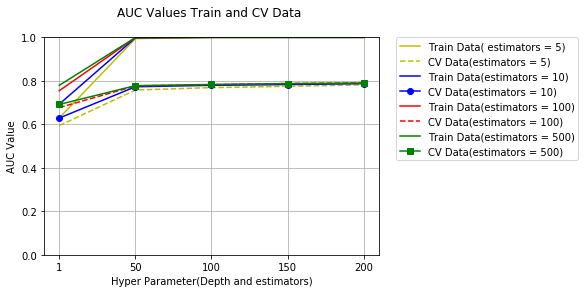

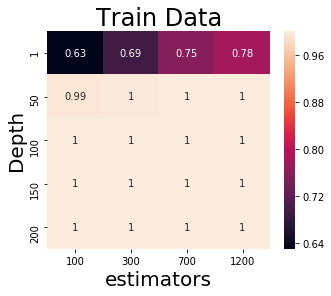

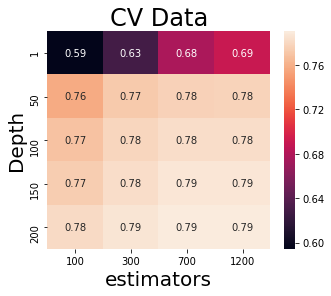

The optimal value of max_depth =  150   Optimal estimator is :  700
threshold train data  0.7141838421616749
threshold test data  0.4856650042104397
The AUC value for train data is  1.0
The AUC value for test data is  0.8355004263997944


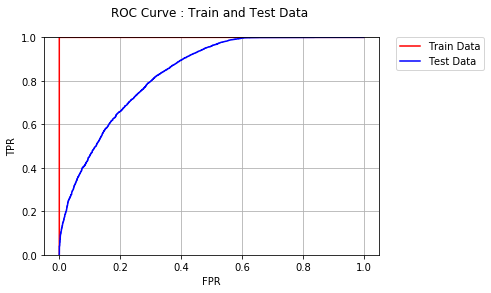

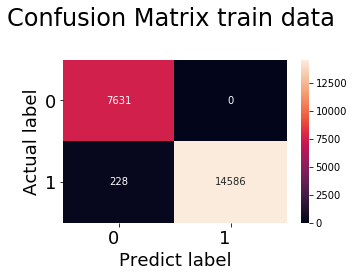

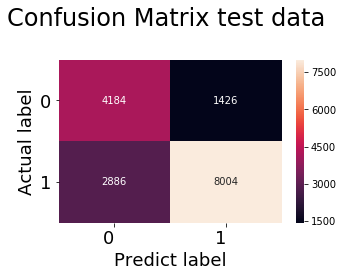

In [ ]:
 run_RF_algo(x_train_data ,x_test_data,x_cv_data,y_train,y_test,y_cv)

#### Observation:
    We have merged all the categorical, numerical features + project_title(encoded using BOW)+project_essay(encoded 
    using BOW).
    1. Optimal value of max_depth = 150 and estimator is : 700
    2. TN = 4184,FP = 1426,TP = 8004 and FN = 2886.
    3. The AUC value for test data is  0.83.

####  categorical, numerical features + project_title(W2V_TFIDF)+project_essay(W2V_TFIDF).

In [ ]:

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_data_wf = hstack((grade_list_train,clean_cat_train,clean_sub_cat_train ,school_state_train,train_teacher_prefix,
                   price_train,teacher_number_of_previously_posted_projects_train,
                   text_w2v_tfidf_train,
                   text_w2v_tidf_train_pe
                   )).tocsr()

print("train data x, y",x_train_data.shape,y_train.shape)

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_cv_data_wf = hstack((grade_list_cv,clean_cat_cv,clean_sub_cat_cv,school_state_cv,cv_teacher_prefix,
                   price_cv,teacher_number_of_previously_posted_projects_cv,
                   text_w2v_tfidf_cv,
                   text_w2v_tidf_cv_pe)).tocsr()

print("CV data x, y ",x_cv_data.shape,y_cv.shape)

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_data_wf = hstack((grade_list_test,clean_cat_test,clean_sub_cat_test ,school_state_test,test_teacher_prefix,
                   price_test,teacher_number_of_previously_posted_projects_test,
                   text_w2v_tfidf_test,
                   text_w2v_tidf_test_pe)).tocsr()

print("test data x , y",x_test_data_wf.shape,y_test.shape)

train data x, y (22445, 10114) (22445,)
CV data x, y  (11055, 10114) (11055,)
test data x , y (16500, 607) (16500,)


### Observation:
    After merging categorical, numerical features + project_title(W2V_TFIDF)) + project_essay(W2V_TFIDF)),
    shape of matrix: 
     • train data (22445, 10114)
     • CV data (11055, 10114)
     • test data (16500, 607)

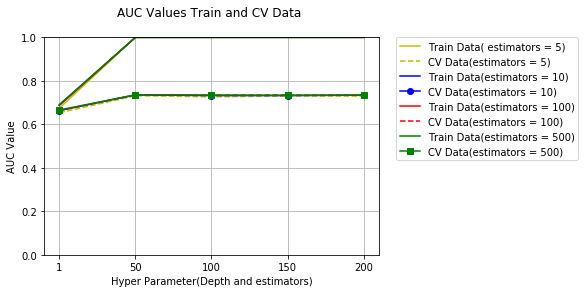

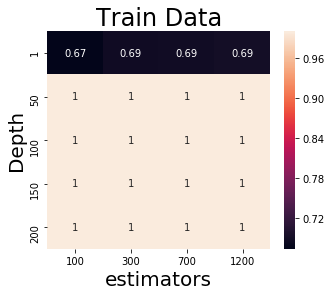

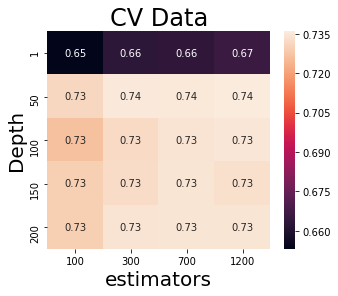

The optimal value of max_depth =  50   Optimal estimator is :  300
threshold train data  0.751662655098596
threshold test data  0.6470806039516778
The AUC value for train data is  1.0
The AUC value for test data is  0.7969935540791155


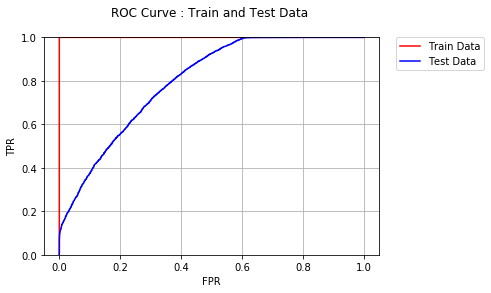

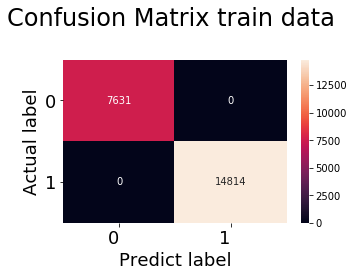

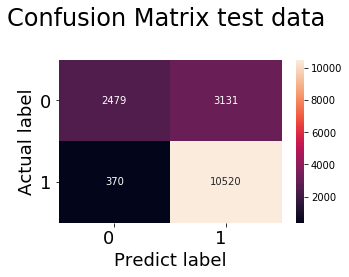

In [ ]:
run_RF_algo(x_train_data_wf ,x_test_data_wf,x_cv_data_wf,y_train,y_test,y_cv)

#### Observation:
    We have merged all the categorical, numerical features + project_title(encoded using BOW)+project_essay(encoded 
    using BOW).
    1. Optimal value of max_depth = 50 and estimator is : 300
    2. TN = 2479,FP = 3131,TP = 10520 and FN = 370.
    3. The AUC value for test data is  0.79.

####  categorical, numerical features + project_title(W2V_AVG)+project_essay(W2V_AVG).

In [ ]:

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_data_wa = hstack((grade_list_train,clean_cat_train,clean_sub_cat_train ,school_state_train,train_teacher_prefix,
                   price_train,teacher_number_of_previously_posted_projects_train,
                   text_w2v_avg_train,
                   text_w2v_avg_train_pe)).tocsr()

print("train data x, y",x_train_data.shape,y_train.shape)

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_cv_data_wa = hstack((grade_list_cv,clean_cat_cv,clean_sub_cat_cv,school_state_cv,cv_teacher_prefix,
                   price_cv,teacher_number_of_previously_posted_projects_cv,
                   text_w2v_avg_cv,
                   text_w2v_avg_cv_pe)).tocsr()

print("CV data x, y ",x_cv_data.shape,y_cv.shape)

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_data_wa = hstack((grade_list_test,clean_cat_test,clean_sub_cat_test ,school_state_test,test_teacher_prefix,
                   price_test,teacher_number_of_previously_posted_projects_test,
                   text_w2v_avg_test,
                   text_w2v_avg_test_pe)).tocsr()

print("test data x , y",x_test_data_wa.shape,y_test.shape)

train data x, y (22445, 10114) (22445,)
CV data x, y  (11055, 10114) (11055,)
test data x , y (16500, 607) (16500,)


### Observation:
    After merging categorical, numerical features + project_title(w2v_avg)) + project_essay(w2v_avg))),
    shape of matrix: 
     • train data (22445, 10131)
     • CV data (11055, 10131)
     • test data (16500, 607)

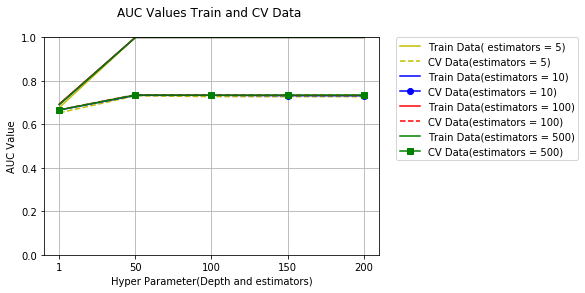

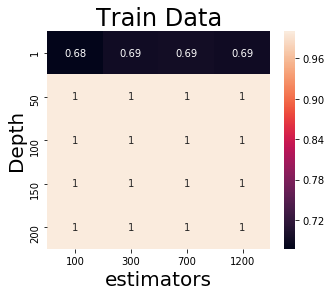

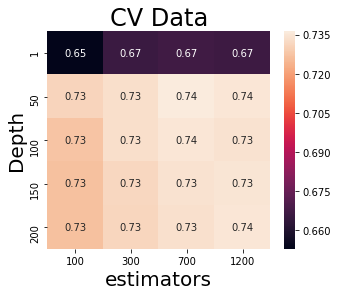

The optimal value of max_depth =  50   Optimal estimator is :  700
threshold train data  0.7902857238452151
threshold test data  0.6491257053930638
The AUC value for train data is  1.0
The AUC value for test data is  0.8002541293669151


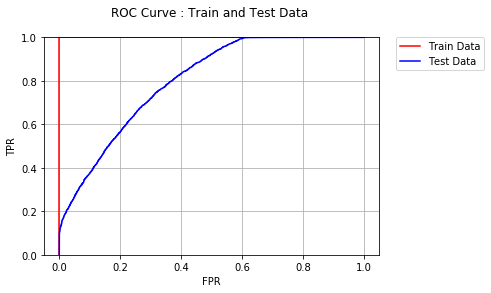

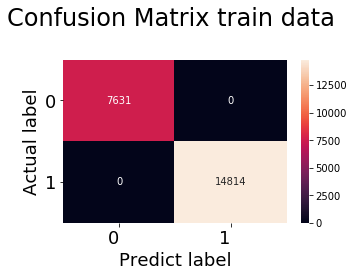

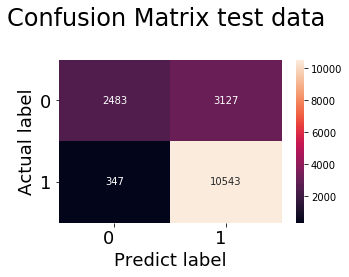

In [ ]:
run_RF_algo(x_train_data_wa,x_test_data_wa,x_cv_data_wa,y_train,y_test,y_cv)

#### Observation:
    We have merged all the categorical, numerical features + project_title(encoded using 
    W2F_AVG)+project_essay(encoded using W2F_AVG) .
    1. Optimal max_depth = 50 and Optimal Estimator is : 700.
    2. TN = 2483,FP = 3127,TP = 10543 and FN = 347. 
    3. The AUC value for test data is  0.80.

#### categorical, numerical features + project_title(TFIDF)+project_essay(TFIDF).

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_data_t = hstack((grade_list_train,clean_cat_train,clean_sub_cat_train ,school_state_train,train_teacher_prefix,
                   price_train,teacher_number_of_previously_posted_projects_train,
                   text_tfidf_train,
                   text_tfidf_project_essay_train)).tocsr()

print("train data x, y",x_train_data_t.shape,y_train.shape)

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_cv_data_t = hstack((grade_list_cv,clean_cat_cv,clean_sub_cat_cv ,school_state_cv,cv_teacher_prefix,
                   price_cv,teacher_number_of_previously_posted_projects_cv,
                   text_tfidf_cv,
                   text_tfidf_project_essay_cv)).tocsr()

print("CV data x, y ",x_cv_data_t.shape,y_cv.shape)

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_data_t = hstack((grade_list_test,clean_cat_test,clean_sub_cat_test ,school_state_test,test_teacher_prefix,
                   price_test,teacher_number_of_previously_posted_projects_test,
                   text_tfidf_test,
                   text_tfidf_project_essay_test)).tocsr()

print("test data x , y",x_test_data_t.shape,y_test.shape)

train data x, y (22445, 10114) (22445,)
CV data x, y  (11055, 10114) (11055,)
test data x , y (16500, 10114) (16500,)


### Observation:
    After merging categorical, numerical features + project_title(TFIDF)) + project_essay(TFIDF)),
    shape of matrix: 
     • train data (22445, 10114)
     • CV data (11055, 10114)
     • test data (16500, 607

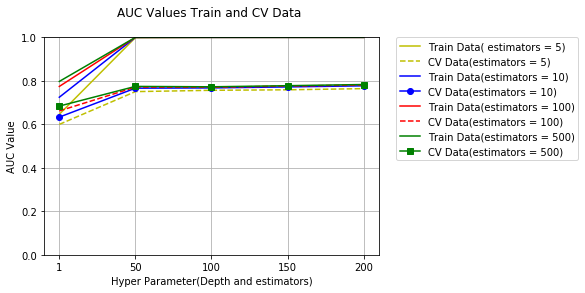

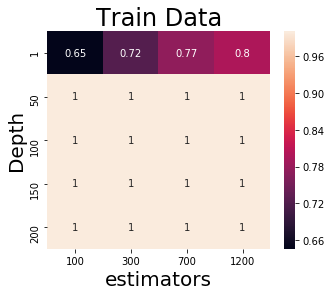

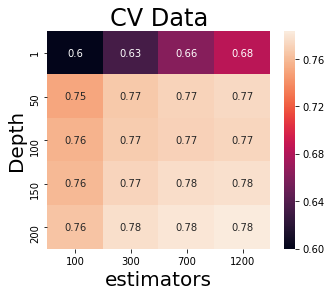

The optimal value of max_depth =  150   Optimal estimator is :  700
threshold train data  0.7365912175122261
threshold test data  0.5226165170409165
The AUC value for train data is  1.0
The AUC value for test data is  0.8288228910397116


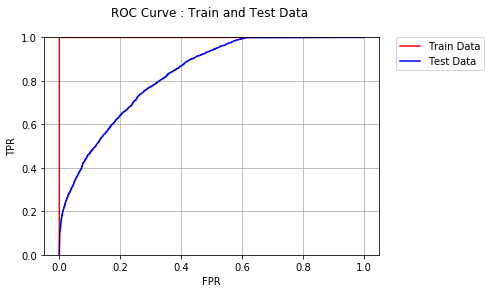

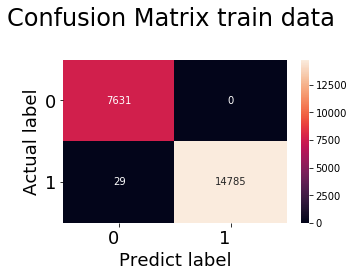

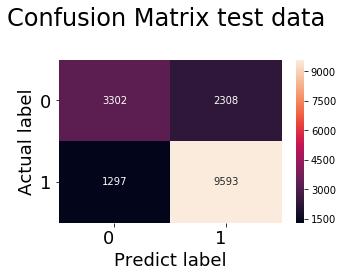

In [ ]:
run_RF_algo(x_train_data_t ,x_test_data_t,x_cv_data_t,y_train,y_test,y_cv)

#### Observation:
    We have merged all the categorical, numerical features + project_title(encoded using 
    TFIDF)+project_essay(encoded using TFIDF) .
    1. Optimal max_depth = 150 and Optimal Estimator is : 700.
    2. TN = 3302,FP = 2308,TP = 9593 and FN = 1297. 
    3. The AUC value for test data is  0.82.

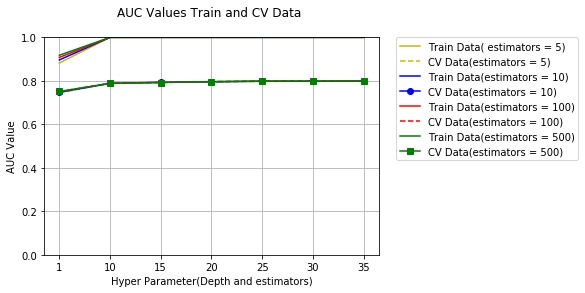

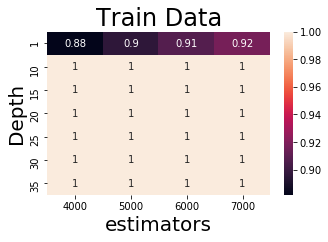

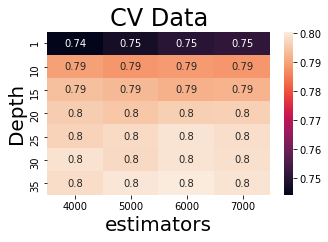

The optimal value of max_depth =  35   Optimal estimator is :  6000
threshold train data  0.4916627768541361
threshold test data  0.7675146220094219
The AUC value for train data is  0.9999999999999999
The AUC value for test data is  0.847600506769199


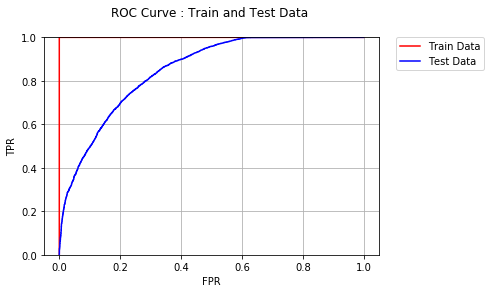

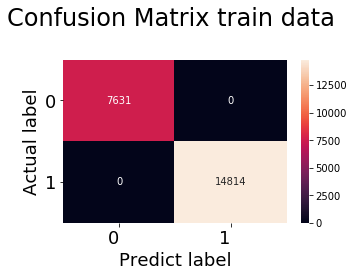

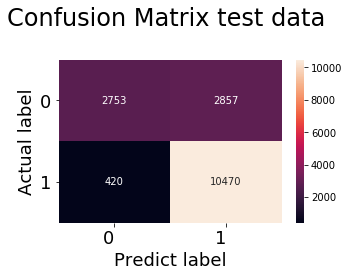

In [ ]:
run_gbt_algo(x_train_data ,x_test_data,x_cv_data,y_train,y_test,y_cv)

#### Observation:
    We have merged all the categorical, numerical features + project_title(encoded using 
    BOW)+project_essay(encoded using BOW) 
    1. Optimal max_depth = 35 and Optimal Estimator is : 6000.
    2. TN = 2753,FP = 2857,TP = 10470 and FN = 420. 
    3. The AUC value for test data is  0.84.

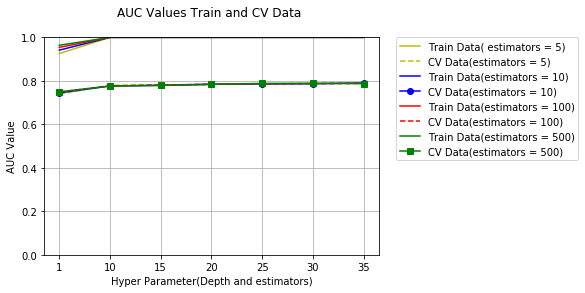

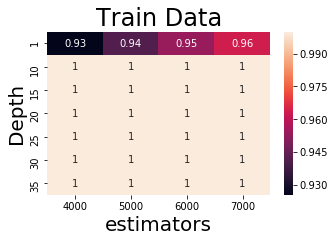

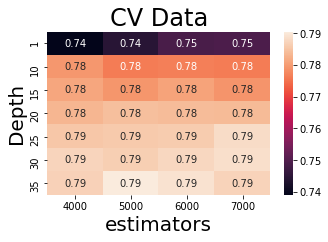

The optimal value of max_depth =  35   Optimal estimator is :  5000
threshold train data  0.501671917788284
threshold test data  0.7574692975200344
The AUC value for train data is  1.0
The AUC value for test data is  0.8429722111734752


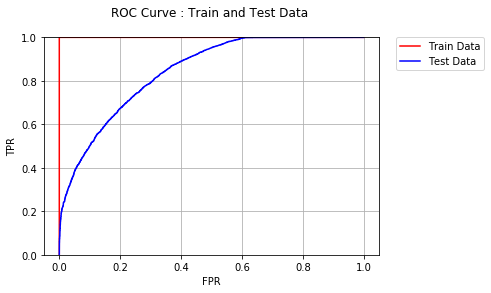

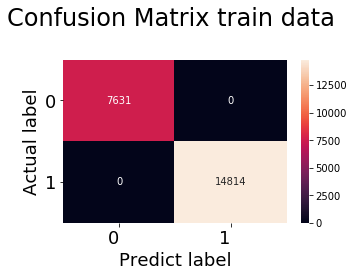

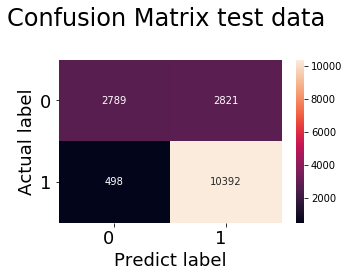

In [ ]:
run_gbt_algo(x_train_data_t ,x_test_data_t,x_cv_data_t,y_train,y_test,y_cv)

#### Observation:
    We have merged all the categorical, numerical features + project_title(encoded using 
    TFIDF)+project_essay(encoded using TFIDF) .
    1. Optimal max_depth = 35 and Optimal Estimator is : 5000.
    2. TN = 2789,FP = 2821,TP = 10392 and FN = 498. 
    3. The AUC value for test data is  0.84.

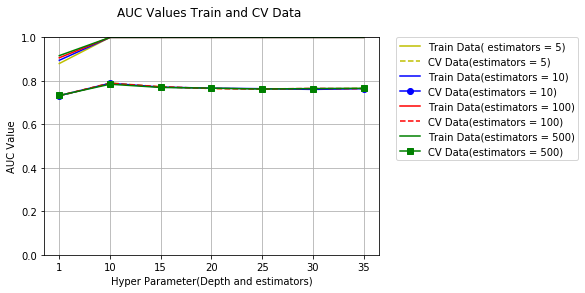

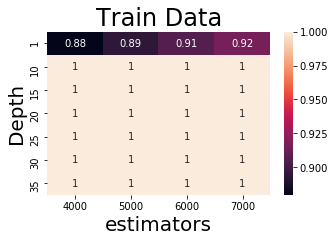

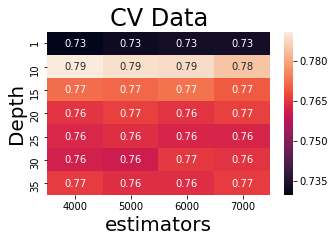

The optimal value of max_depth =  10   Optimal estimator is :  4000
threshold train data  0.5109087155634274
threshold test data  0.762156987961178
The AUC value for train data is  1.0
The AUC value for test data is  0.8419898056893681


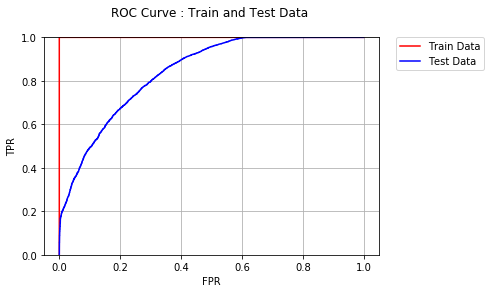

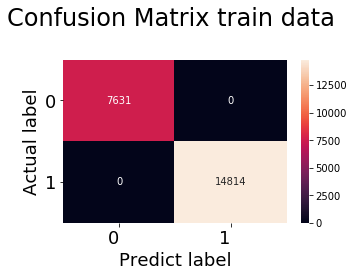

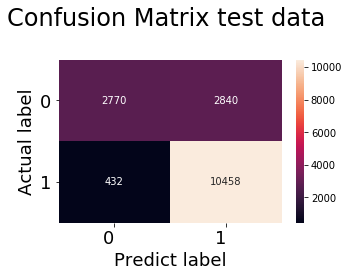

In [ ]:
run_gbt_algo(x_train_data_wa ,x_test_data_wa,x_cv_data_wa,y_train,y_test,y_cv)

#### Observation:
    We have merged all the categorical, numerical features + project_title(encoded using 
    W2V_AVG)+project_essay(encoded using W2V_AVG) .
    1. Optimal max_depth = 10 and Optimal Estimator is : 4000.
    2. TN = 2770,FP = 2840,TP = 10458 and FN = 432. 
    3. The AUC value for test data is  0.84.

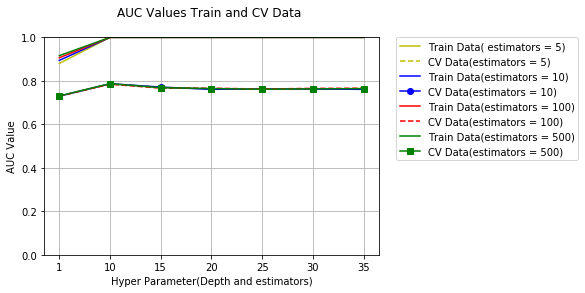

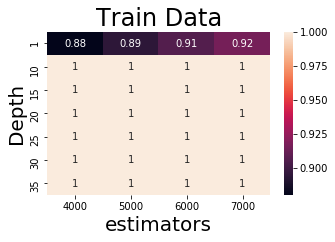

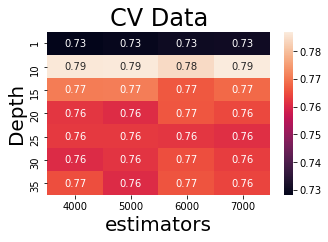

The optimal value of max_depth =  10   Optimal estimator is :  7000
threshold train data  0.5018803497545797
threshold test data  0.7585329280218096
The AUC value for train data is  1.0
The AUC value for test data is  0.8400559966870127


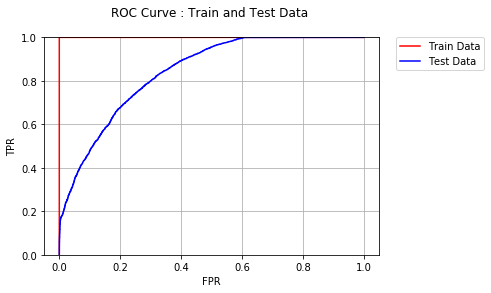

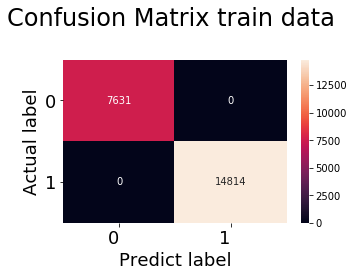

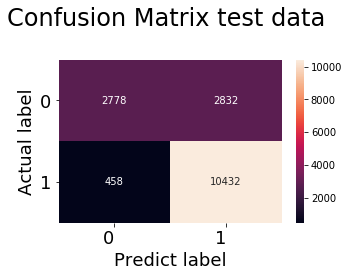

In [ ]:
run_gbt_algo(x_train_data_wf ,x_test_data_wf,x_cv_data_wf,y_train,y_test,y_cv)

#### Observation:
    We have merged all the categorical, numerical features + project_title(encoded using 
    W2V TFIDF)+project_essay(encoded using W2V TFIDF) .
    1. Optimal max_depth = 10 and Optimal Estimator is : 7000.
    2. TN = 2778,FP = 2832,TP = 10432 and FN = 458. 
    3. The AUC value for test data is  0.84.

In [ ]:
from prettytable import PrettyTable
y = PrettyTable()
y.field_names = ["","Algo","Dataset","optimum_max_depth","optimum estimator","AUC_test"]

y.add_row([1,"RF","cat,num + proj_title+ proj_essay(BOW)","150","700","0.83"])
y.add_row([2,"GBDT","cat,num + proj_title+ proj_essay(BOW)","35","6000","0.84"])
y.add_row(["--","-------","-----------------------------------------","-----","---","--"])
y.add_row([3,"RF","cat,num + proj_title+proj_essay(TFIDF)","150","700","0.80"])
y.add_row([4,"GBDT","cat,num + proj_title+proj_essay(TFIDF)","35","1000","0.84"])
y.add_row(["--","-------","-----------------------------------------","-----","---","--"])
y.add_row([5,"RF","cat,num + proj_title+proj_essay(W2V_TFIDF)","50","300","0.79"])
y.add_row([6,"GBDT","cat,num + proj_title+proj_essay(W2V_TFIDF)","10","4000","0.84"])
y.add_row(["--","-------","-----------------------------------------","-----","---","--"])
y.add_row([7,"RF","cat,num + proj_title+proj_essay(W2V_AVG)","50","700","0.84"])
y.add_row([8,"GBDT","cat,num + proj_title+proj_essay(W2V_AVG)","10","7000","0.84"])
print(y)

+----+---------+--------------------------------------------+-------------------+-------------------+----------+
|    |   Algo  |                  Dataset                   | optimum_max_depth | optimum estimator | AUC_test |
+----+---------+--------------------------------------------+-------------------+-------------------+----------+
| 1  |    RF   |   cat,num + proj_title+ proj_essay(BOW)    |        150        |        700        |   0.83   |
| 2  |   GBDT  |   cat,num + proj_title+ proj_essay(BOW)    |         35        |        6000       |   0.84   |
| -- | ------- | -----------------------------------------  |       -----       |        ---        |    --    |
| 3  |    RF   |   cat,num + proj_title+proj_essay(TFIDF)   |        150        |        700        |   0.80   |
| 4  |   GBDT  |   cat,num + proj_title+proj_essay(TFIDF)   |         35        |        1000       |   0.84   |
| -- | ------- | -----------------------------------------  |       -----       |        ---    

In [ ]:
from prettytable import PrettyTable
y = PrettyTable()
y.field_names = ["","Algo","Dataset","TN","FP","TP","FN"]

y.add_row([1,"RF","cat,num + proj_title(BOW)+proj_essay(BOW)","4184","1426","8004","2886"])
y.add_row([2,"GBDT","cat,num + proj_title(BOW)+proj_essay(BOW)","2753","2857","10470" ,"420"])
y.add_row(["--","--------------","-------------------------------------------","-----","---","--","--"])
y.add_row([3,"RF","cat,num + proj_title(TFIDF)+proj_essay(TFIDF)","3550","2260","9463","1427"])
y.add_row([4,"GBDT","cat,num + proj_title(TFIDF)+proj_essay(TFIDF)","2789","2821","10392" ,"498"])
y.add_row(["--","--------------","-------------------------------------------","-----","---","--","--"])
y.add_row([5,"RF","cat,num + proj_title(W2V_TFIDF)+proj_essay(W2V_TFIDF)","2479","3131","10520","370"])
y.add_row([6,"GBDT","cat,num + proj_title(W2V_TFIDF)+proj_essay(W2V_TFIDF)","2692","2918","10498","392"])
y.add_row(["--","--------------","-------------------------------------------","-----","---","--","--"])
y.add_row([7,"RF","cat,num + proj_title(W2V_AVG)+proj_essay(W2V_AVG)","2483","3127","10543","347"])
y.add_row([8,"GBDT","cat,num + proj_title(W2V_AVG)+proj_essay(W2V_AVG)","2770","2840","10458","432"])
print(y)

+----+----------------+-------------------------------------------------------+-------+------+-------+------+
|    |      Algo      |                        Dataset                        |   TN  |  FP  |   TP  |  FN  |
+----+----------------+-------------------------------------------------------+-------+------+-------+------+
| 1  |       RF       |       cat,num + proj_title(BOW)+proj_essay(BOW)       |  4184 | 1426 |  8004 | 2886 |
| 2  |      GBDT      |       cat,num + proj_title(BOW)+proj_essay(BOW)       |  2753 | 2857 | 10470 | 420  |
| -- | -------------- |      -------------------------------------------      | ----- | ---  |   --  |  --  |
| 3  |       RF       |     cat,num + proj_title(TFIDF)+proj_essay(TFIDF)     |  3550 | 2260 |  9463 | 1427 |
| 4  |      GBDT      |     cat,num + proj_title(TFIDF)+proj_essay(TFIDF)     |  2789 | 2821 | 10392 | 498  |
| -- | -------------- |      -------------------------------------------      | ----- | ---  |   --  |  --  |
| 5  |    

### Conclusion:
     1. There are 109248 datapoints and 28 features in project file and 1541272 datapoints and 4 features in 
        resource file.
     2. AUC for ROC curve for test model >= 79%
     